## Install needed bibs

In [92]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
import time

In [93]:
grammars1 = []
grammars2 = []
grammars3 = []
grammars4 = []
grammars5 = []
probabilities1 = []
probabilities2 = []
probabilities3 = []
probabilities4 = []
probabilities5 = []
time1 = []
time2 = []
time3 = []
time4 = []
time5 = []

amount_of_grammars = 20
probability_changing_factor = 0.1

probability_for_new_non_terminal = 0.5
probability_for_terminal = 0.5
probability_for_multiple_right_side = 0.5
probability_favour_non_terminal_for_terminal_on_right_side =  0.5
probability_favour_non_terminal_for_terminal_in_start_production = 0.5
decreasing_probability_factor = 0.1

def manipulate_probability_for_new_non_terminal(probability):
    return {
      "probabilityForNewNonTerminal": probability,
      "probabilityForTerminal": probability_for_terminal,
      "probabilityForMultipleRightSide": probability_for_multiple_right_side,
      "probabilityFavourNonTerminalForTerminalOnRightSide": probability_favour_non_terminal_for_terminal_on_right_side,
      "probabilityFavourNonTerminalForTerminalInStartProduction": probability_favour_non_terminal_for_terminal_in_start_production,
      "decreasingProbabilityFactor": decreasing_probability_factor
    }

def manipulate_probability_for_terminal(probability):
    return {
      "probabilityForNewNonTerminal": probability_for_new_non_terminal,
      "probabilityForTerminal": probability,
      "probabilityForMultipleRightSide": probability_for_multiple_right_side,
      "probabilityFavourNonTerminalForTerminalOnRightSide": probability_favour_non_terminal_for_terminal_on_right_side,
      "probabilityFavourNonTerminalForTerminalInStartProduction": probability_favour_non_terminal_for_terminal_in_start_production,
      "decreasingProbabilityFactor": decreasing_probability_factor
    }

def manipulate_probability_for_multiple_right_side(probability):
    return {
      "probabilityForNewNonTerminal": probability_for_new_non_terminal,
      "probabilityForTerminal": probability_for_terminal,
      "probabilityForMultipleRightSide": probability,
      "probabilityFavourNonTerminalForTerminalOnRightSide": probability_favour_non_terminal_for_terminal_on_right_side,
      "probabilityFavourNonTerminalForTerminalInStartProduction": probability_favour_non_terminal_for_terminal_in_start_production,
      "decreasingProbabilityFactor": decreasing_probability_factor
    }

def manipulate_probability_favour_non_terminal_for_terminal_on_right_side(probability):
    return {
      "probabilityForNewNonTerminal": probability_for_new_non_terminal,
      "probabilityForTerminal": probability_for_terminal,
      "probabilityForMultipleRightSide": probability_for_multiple_right_side,
      "probabilityFavourNonTerminalForTerminalOnRightSide": probability,
      "probabilityFavourNonTerminalForTerminalInStartProduction": probability_favour_non_terminal_for_terminal_in_start_production,
      "decreasingProbabilityFactor": decreasing_probability_factor
    }

def manipulate_probability_favour_non_terminal_for_terminal_in_start_production(probability):
    return {
      "probabilityForNewNonTerminal": probability_for_new_non_terminal,
      "probabilityForTerminal": probability_for_terminal,
      "probabilityForMultipleRightSide": probability_for_multiple_right_side,
      "probabilityFavourNonTerminalForTerminalOnRightSide": probability_favour_non_terminal_for_terminal_on_right_side,
      "probabilityFavourNonTerminalForTerminalInStartProduction": probability,
      "decreasingProbabilityFactor": decreasing_probability_factor
    }

## Send grammar generation request

In [94]:
def request_grammars (payload):    
    headers = {'Content-type': 'application/json'}
    response = requests.post("https://studienarbeit.mohjohfox.de/api/get/grammar/probability", headers=headers, data=json.dumps(payload))
    if response.status_code == 200:
        # takes response as json
        return response.json()     

In [95]:
value = 0
start = 0
end = 0

for i in range(amount_of_grammars):
    start = time.time()
    grammars1.append(request_grammars(manipulate_probability_for_new_non_terminal(value)))
    probabilities1.append(value)
    end = time.time()
    time1.append(end - start)
    
    start = time.time()
    grammars2.append(request_grammars(manipulate_probability_for_terminal(value)))
    probabilities2.append(value)
    end = time.time()
    time2.append(end - start)
    
    start = time.time()
    grammars3.append(request_grammars(manipulate_probability_for_multiple_right_side(value)))
    probabilities3.append(value)
    end = time.time()
    time3.append(end - start)
    
    start = time.time()
    grammars4.append(request_grammars(manipulate_probability_favour_non_terminal_for_terminal_on_right_side(value)))
    probabilities4.append(value)
    end = time.time()
    time4.append(end - start)
    
    start = time.time()
    grammars5.append(request_grammars(manipulate_probability_favour_non_terminal_for_terminal_in_start_production(value)))
    probabilities5.append(value)
    end = time.time()
    time5.append(end - start)
    
    new_value = value + probability_changing_factor
    if new_value <= 1.0: 
        value = new_value

## Formatting data

In [96]:
amount_terminals1 = []
amount_non_terminals1 = []
amount_productions1 = []

for grammar in grammars1:
    amount_terminals1.append(len(grammar['terminals']))
    amount_non_terminals1.append(len(grammar['nonTerminals']))
    amount_productions1.append(len(grammar['productions']))
    
amount_terminals2 = []
amount_non_terminals2 = []
amount_productions2 = []

for grammar in grammars2:
    amount_terminals2.append(len(grammar['terminals']))
    amount_non_terminals2.append(len(grammar['nonTerminals']))
    amount_productions2.append(len(grammar['productions']))
    
amount_terminals3 = []
amount_non_terminals3 = []
amount_productions3 = []

for grammar in grammars3:
    amount_terminals3.append(len(grammar['terminals']))
    amount_non_terminals3.append(len(grammar['nonTerminals']))
    amount_productions3.append(len(grammar['productions']))
    
amount_terminals4 = []
amount_non_terminals4 = []
amount_productions4 = []

for grammar in grammars4:
    amount_terminals4.append(len(grammar['terminals']))
    amount_non_terminals4.append(len(grammar['nonTerminals']))
    amount_productions4.append(len(grammar['productions']))
    
amount_terminals5 = []
amount_non_terminals5 = []
amount_productions5 = []

for grammar in grammars5:
    amount_terminals5.append(len(grammar['terminals']))
    amount_non_terminals5.append(len(grammar['nonTerminals']))
    amount_productions5.append(len(grammar['productions']))

## Analyzing

### Amount of terminals, non-terminals and productions

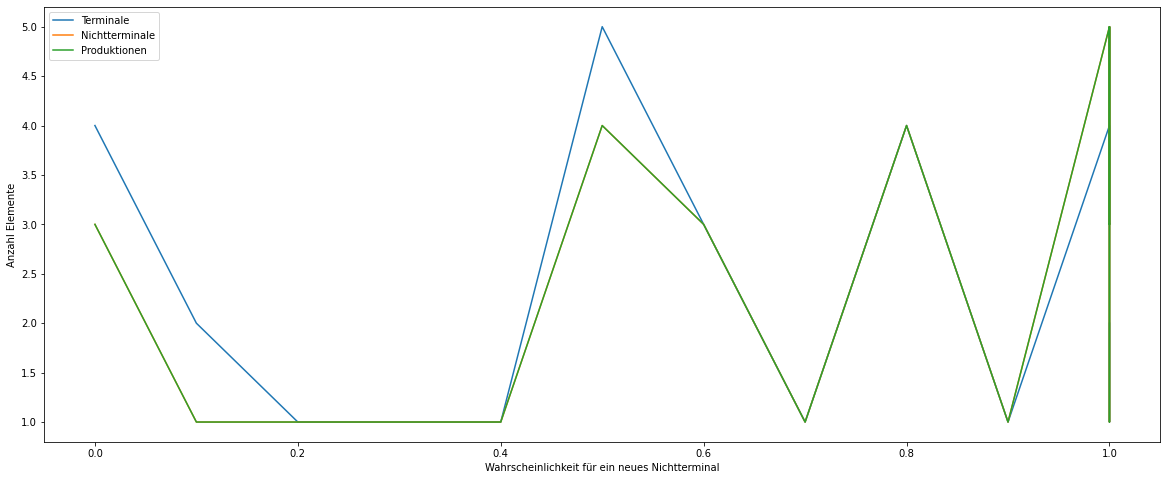

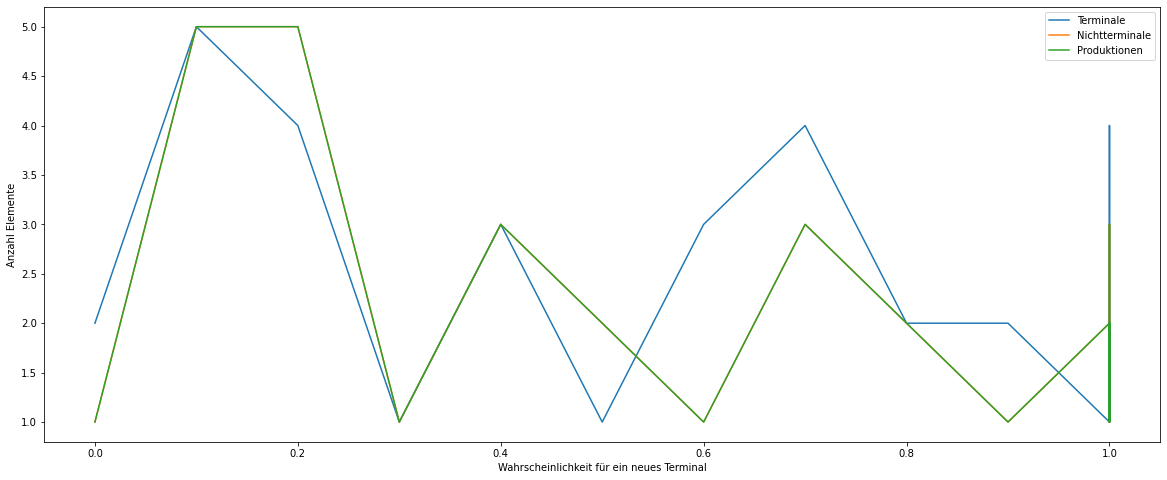

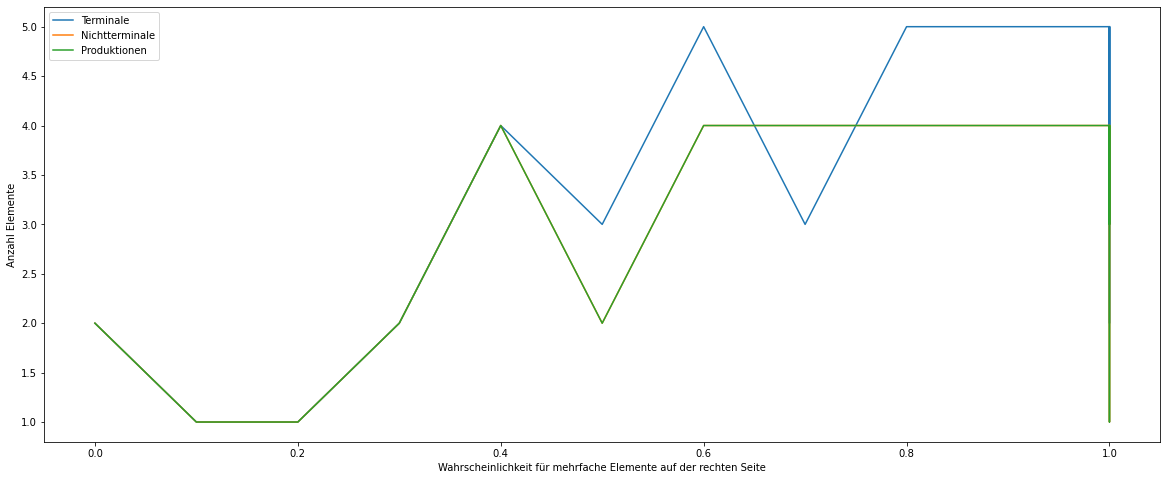

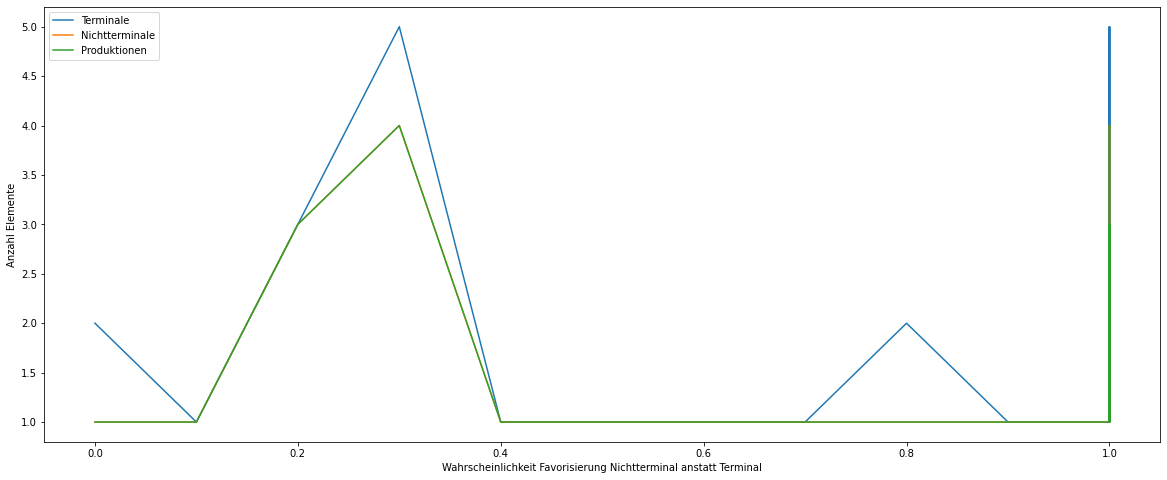

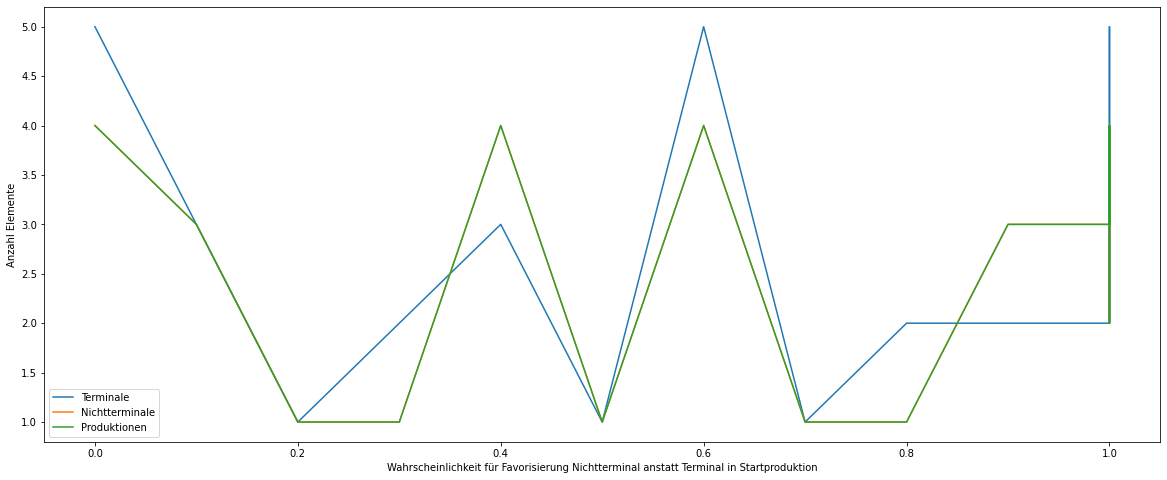

In [97]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(probabilities1, amount_terminals1, label='Terminale')
plt.plot(probabilities1, amount_non_terminals1, label='Nichtterminale')
plt.plot(probabilities1, amount_productions1, label='Produktionen')

plt.legend()
plt.xlabel('Wahrscheinlichkeit für ein neues Nichtterminal')
plt.ylabel('Anzahl Elemente')
plt.show()

# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(probabilities2, amount_terminals2, label='Terminale')
plt.plot(probabilities2, amount_non_terminals2, label='Nichtterminale')
plt.plot(probabilities2, amount_productions2, label='Produktionen')

plt.legend()
plt.xlabel('Wahrscheinlichkeit für ein neues Terminal')
plt.ylabel('Anzahl Elemente')
plt.show()

# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(probabilities3, amount_terminals3, label='Terminale')
plt.plot(probabilities3, amount_non_terminals3, label='Nichtterminale')
plt.plot(probabilities3, amount_productions3, label='Produktionen')

plt.legend()
plt.xlabel('Wahrscheinlichkeit für mehrfache Elemente auf der rechten Seite')
plt.ylabel('Anzahl Elemente')
plt.show()

# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(probabilities4, amount_terminals4, label='Terminale')
plt.plot(probabilities4, amount_non_terminals4, label='Nichtterminale')
plt.plot(probabilities4, amount_productions4, label='Produktionen')

plt.legend()
plt.xlabel('Wahrscheinlichkeit Favorisierung Nichtterminal anstatt Terminal')
plt.ylabel('Anzahl Elemente')
plt.show()

# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(probabilities5, amount_terminals5, label='Terminale')
plt.plot(probabilities5, amount_non_terminals5, label='Nichtterminale')
plt.plot(probabilities5, amount_productions5, label='Produktionen')

plt.legend()
plt.xlabel('Wahrscheinlichkeit für Favorisierung Nichtterminal anstatt Terminal in Startproduktion')
plt.ylabel('Anzahl Elemente')
plt.show()

### Generation time

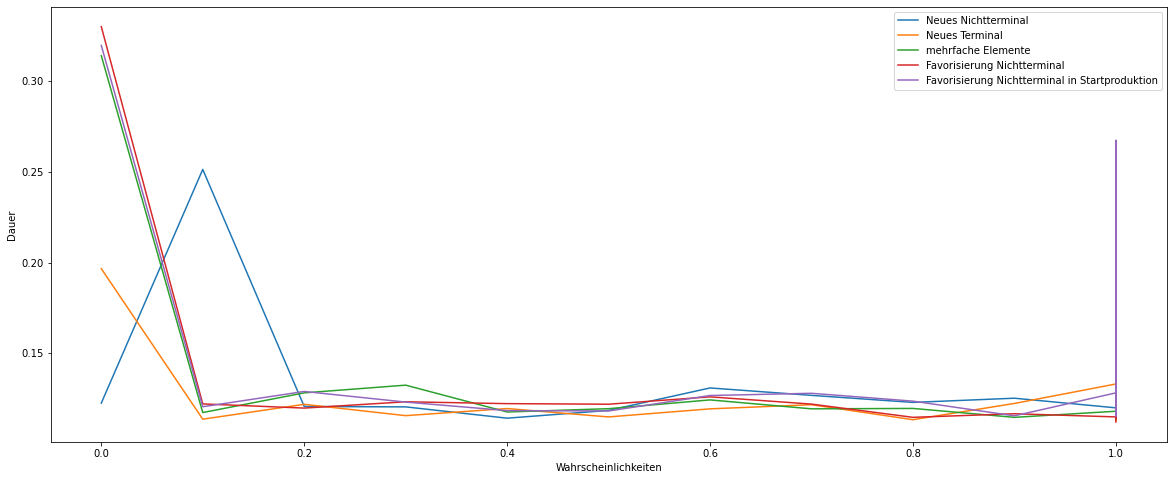

In [98]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(probabilities1, time1, label='Neues Nichtterminal')
plt.plot(probabilities2, time2, label='Neues Terminal')
plt.plot(probabilities3, time3, label='mehrfache Elemente')
plt.plot(probabilities4, time4, label='Favorisierung Nichtterminal')
plt.plot(probabilities5, time5, label='Favorisierung Nichtterminal in Startproduktion')

plt.legend()
plt.xlabel('Wahrscheinlichkeiten')
plt.ylabel('Dauer')
plt.show()

### Amount of productions

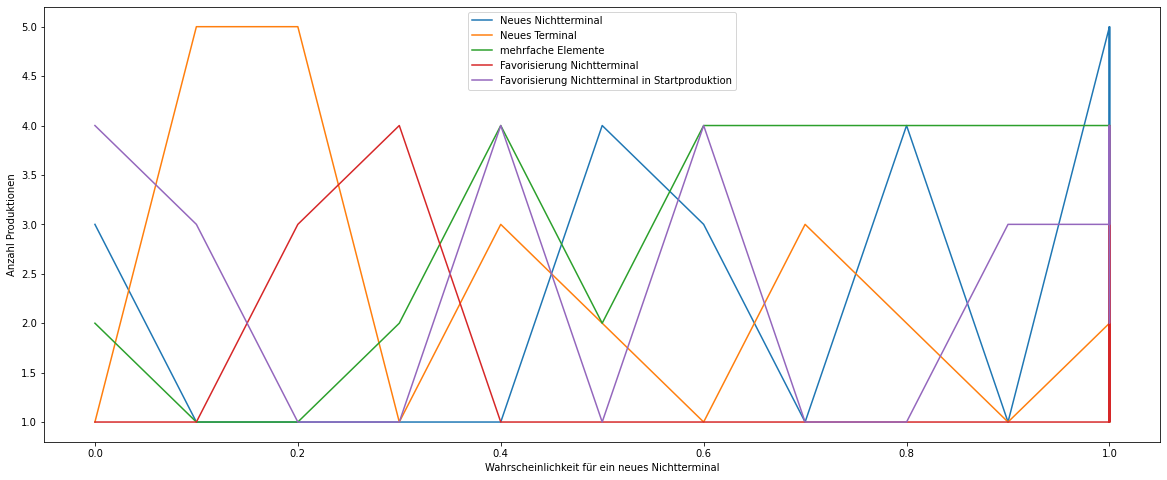

In [99]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(probabilities1, amount_productions1, label='Neues Nichtterminal')
plt.plot(probabilities2, amount_productions2, label='Neues Terminal')
plt.plot(probabilities3, amount_productions3, label='mehrfache Elemente')
plt.plot(probabilities4, amount_productions4, label='Favorisierung Nichtterminal')
plt.plot(probabilities5, amount_productions5, label='Favorisierung Nichtterminal in Startproduktion')

plt.legend()
plt.xlabel('Wahrscheinlichkeit für ein neues Nichtterminal')
plt.ylabel('Anzahl Produktionen')
plt.show()  